# Kaggle API

In [ ]:
!pip install kaggle

! mkdir ~/.kaggle

!rm -r /root/.kaggle

! cp kaggle.json ~/.kaggle

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d jangedoo/utkface-new

#! kaggle datasets list

! unzip utkface-new.zip

# GPU

In [ ]:
device_list = tf.test.gpu_device_name()

device_list

In [ ]:
!nvidia-smi

# PACKAGES

In [118]:
import numpy as np
import pandas as pd 
import os
import cv2
from sklearn.svm import SVC
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from skimage.color import rgb2gray
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.applications import VGG16
from skimage.feature import hog
from skimage import data, exposure
import random
from keras import layers, losses
from keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import math
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [119]:
def display(img):
    plt.imshow(img)
    plt.show()

def prediction_metrics(model, X_test, y_test, classes):
    preds = []
    truth = []
    y_hat = model.predict(X_test)

    for i in range(X_test.shape[0]):
        
        predict_index = np.argmax(y_hat[i])
        preds.append(predict_index) 
        
        true_index = np.argmax(y_test[i])
        truth.append(true_index)
        
    mcc = matthews_corrcoef(truth, preds)
    print("MCC: ", mcc)
    label = list(set(classes))
    cm = confusion_matrix(truth, preds)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=label, yticklabels=label)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(classification_report(truth, preds))

In [120]:
#path server
#path = "/UTKFace/"
#path martim
#path = "../../../../DadosProj/UTKFace/"
#path alex
path = "../../../data_project/UTKFace/"

files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 23708
100_0_0_20170112213500903.jpg.chip.jpg


# DATA NORM

In [190]:
images = []
ages = []
genders = []
counter = 0

for file in files:
    if counter == 23708:
        break
    
    image = cv2.imread(path+file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dsize=(200, 200))
    image = image.reshape((image.shape[0], image.shape[1], 3)) 
    #image = image.astype('float32') / 255.0 #normalizing values on each point 
    image = image / 255.0

    #verificar se imagens todas estao no range 0 a 255 (se sao rgb)

    images.append(image)
    delimit = file.split('_')
    ages.append(int(delimit[0]))
    # first number is age (0-116 possible values)
    genders.append(int(delimit[1]))
    # second number is gender (0 for male, 1 for female)


    counter += 1
    
X = np.squeeze(images)

KeyboardInterrupt: 

In [122]:
### Age classes
age_classes = []
for i in ages:
    i = int(i)
    if i <= 1:
        age_classes.append(0)
    if (i>1) and (i<=13):
        age_classes.append(1)
    if (i>13) and (i<17):
        age_classes.append(2)
    if (i>=17) and (i<30):
        age_classes.append(3)
    if (i>=30) and (i<60):
        age_classes.append(4)
    if i>=60:
        age_classes.append(5)

age_labels = ["Baby",   # index 0
        "Infant",       # index 1
        "Adolescent",   # index 2 
        "Young Adult",  # index 3 
        "Adult"         # index 4
        "Old Adult",    # index 5
        ]

age_categories = to_categorical(age_classes, num_classes=6)
age_categories[:20]
print("Age Classes finished")

Age Classes finished


# DISTRIBUTIONS

In [123]:
print(len(age_classes))
print(type(age_classes))
unique_values = list(set(age_classes))
print(unique_values)

100
<class 'list'>
[1, 5]


In [124]:
img_all = pd.DataFrame()
img_all["age"] = age_classes
img_all["gender"] = genders

img_gender = pd.DataFrame()
img_gender["gender"] = genders

img_age = pd.DataFrame()
img_age["age"] = age_classes

print("age\n", img_age.age.value_counts())
print("gender\n", img_gender.gender.value_counts())

age
 1    81
5    19
Name: age, dtype: int64
gender
 0    86
1    14
Name: gender, dtype: int64


In [ ]:
sns.distplot(genders)

c:\Users\afbso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

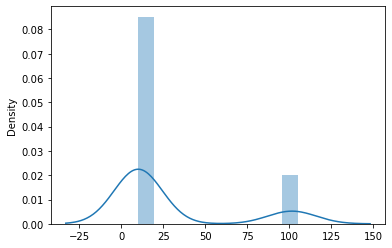

In [189]:
sns.distplot(ages)

# MODELS

In [125]:
def CNN (input_shape, output, activation):
    
    model = tf.keras.Sequential()

    
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape = input_shape)) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
 

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))


    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    
    model.add(tf.keras.layers.Dropout(0.5))
    
    model.add(tf.keras.layers.Dense(output, activation=activation))
    
    model.summary()
    
    return model

#otimizar 2k
#adicionar mais conv?
#Dropout antes do flaten apenas
#Mexer otimizador (lr)
#implementar early stoping (). Early Stoping tem patience: e.g., 10 epcohs, ele espera 10 epochs antes de parar.
#ir gravando cnn no servidor

## BASE

### Gender

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, genders, test_size=0.2, random_state=42)

In [127]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [128]:
model = CNN((200,200,3), 1, 'sigmoid')

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_83 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_84 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 25, 25, 64)     

In [129]:
#for age use categorical_crossentropy instead
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

history_base_gender = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/25
3/3 [==============================] - 3s 625ms/step - loss: 0.4689 - accuracy: 0.7500 - val_loss: 0.6839 - val_accuracy: 0.8000
Epoch 2/25
3/3 [==============================] - 1s 503ms/step - loss: 0.4798 - accuracy: 0.8625 - val_loss: 0.5137 - val_accuracy: 0.8000
Epoch 3/25
3/3 [==============================] - 1s 463ms/step - loss: 0.3477 - accuracy: 0.8750 - val_loss: 0.8460 - val_accuracy: 0.8000
Epoch 4/25
3/3 [==============================] - 1s 452ms/step - loss: 0.5432 - accuracy: 0.8750 - val_loss: 0.5555 - val_accuracy: 0.8000
Epoch 5/25
3/3 [==============================] - 2s 498ms/step - loss: 0.3328 - accuracy: 0.8750 - val_loss: 0.5069 - val_accuracy: 0.8000
Epoch 6/25
3/3 [==============================] - 1s 467ms/step - loss: 0.3945 - accuracy: 0.8750 - val_loss: 0.5054 - val_accuracy: 0.8000
Epoch 7/25
3/3 [==============================] - 1s 479ms/step - loss: 0.3848 - accuracy: 0.8750 - val_loss: 0.5985 - val_accuracy: 0.8000
Epoch 8/25
3/3 [====

1/1 [==============================] - 0s 166ms/step
MCC:  0.0


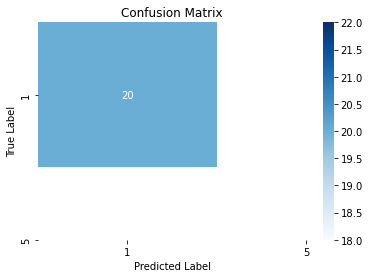

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [130]:
prediction_metrics(model, X_test, y_test, age_classes)

### Age

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, age_categories, test_size = 0.2, shuffle = True)

In [132]:
model = CNN((200,200,3), 6, 'softmax')

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_88 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 25, 25, 64)     

In [133]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

history_base_age = model.fit(X_train, y_train,
        batch_size=32,
        epochs=25,
        validation_data=(X_test, y_test),)

Epoch 1/25
3/3 [==============================] - 3s 529ms/step - loss: 1.3464 - accuracy: 0.5250 - val_loss: 0.4570 - val_accuracy: 0.8500
Epoch 2/25
3/3 [==============================] - 1s 446ms/step - loss: 0.8460 - accuracy: 0.7000 - val_loss: 0.4597 - val_accuracy: 0.8500
Epoch 3/25
3/3 [==============================] - 1s 442ms/step - loss: 0.8112 - accuracy: 0.7875 - val_loss: 0.4846 - val_accuracy: 0.8500
Epoch 4/25
3/3 [==============================] - 1s 429ms/step - loss: 0.5158 - accuracy: 0.8125 - val_loss: 0.4111 - val_accuracy: 0.8500
Epoch 5/25
3/3 [==============================] - 1s 416ms/step - loss: 0.5072 - accuracy: 0.7875 - val_loss: 0.3989 - val_accuracy: 0.8500
Epoch 6/25
3/3 [==============================] - 1s 424ms/step - loss: 0.4536 - accuracy: 0.7750 - val_loss: 0.4380 - val_accuracy: 0.8500
Epoch 7/25
3/3 [==============================] - 1s 435ms/step - loss: 0.5837 - accuracy: 0.7750 - val_loss: 0.4308 - val_accuracy: 0.8500
Epoch 8/25
3/3 [====

1/1 [==============================] - 0s 227ms/step
MCC:  0.5461186812727502


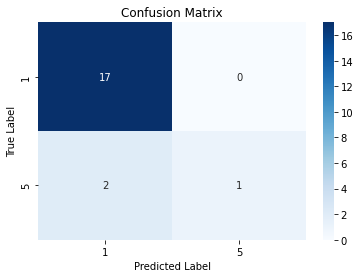

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        17
           5       1.00      0.33      0.50         3

    accuracy                           0.90        20
   macro avg       0.95      0.67      0.72        20
weighted avg       0.91      0.90      0.88        20



In [134]:
prediction_metrics(model, X_test, y_test, age_classes)

# DATA NOT NORM

In [135]:
images = []
ages = []
genders = []
counter = 0

for file in files:
    if counter == 100:
        break
    
    image = cv2.imread(path+file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dsize=(200, 200))
    image = image.reshape((image.shape[0], image.shape[1], 3)) 
    #image = image.astype('float32') / 255.0 #normalizing values on each point 
    #image = image / 255.0

    #verificar se imagens todas estao no range 0 a 255 (se sao rgb)

    images.append(image)
    delimit = file.split('_')
    ages.append(int(delimit[0]))
    # first number is age (0-116 possible values)
    genders.append(int(delimit[1]))
    # second number is gender (0 for male, 1 for female)


    counter += 1
    
    X = np.squeeze(images)

## HOG

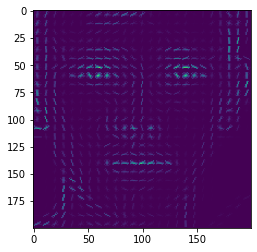

In [136]:
image_check = images[25]

# define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# compute HOG features and visualize them
hog_features, hog_image = hog(image_check, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, visualize=True,channel_axis=2)



# rescale image intensity for better visualization
#hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# display HOG features
plt.imshow(hog_image)
plt.show()

In [137]:
# Extract HOG features from the images
hog_features = []
for img in images:
    #hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
    #                cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, multichannel=True, channel_axis=2)
    hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, channel_axis=2)
    
    hog_features.append(hog_feature)
hog_features = np.array(hog_features)

# Normalize the features to have zero mean and unit variance
mean = np.mean(hog_features, axis=0)
std = np.std(hog_features, axis=0)
hog_features_norm = (hog_features - mean) / std

### Gender

In [138]:
cnn = Sequential()

#tratado
cnn.add(layers.Reshape((144, 144, 1), input_shape=(20736,)))
#cnn.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=X_train[1].shape))


cnn.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(Flatten())

cnn.add(Dense(64, activation='relu'))

cnn.add(layers.Dropout(0.5))

#output layer with 2 filters for number of classes the model will choose to do predictions
#and since gender is just binary classification sigmoid is appropriate
#when doing classification for age (wont be binary classification) then softmax is good choice
cnn.add(Dense(1, activation='sigmoid'))

cnn.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_15 (Reshape)        (None, 144, 144, 1)       0         
                                                                 
 conv2d_89 (Conv2D)          (None, 144, 144, 16)      160       
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 72, 72, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_90 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_91 (Conv2D)          (None, 36, 36, 64)      

In [139]:
X_train, X_test, y_train, y_test = train_test_split(hog_features_norm, genders, test_size=0.2, random_state=42)

In [140]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [141]:
cnn.compile(optimizer="adam", loss="binary_crossentropy",
            metrics=['accuracy'])

history_hog_gender = cnn.fit(X_train, y_train,
                    epochs=25,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/25
3/3 [==============================] - 2s 313ms/step - loss: 1.6419 - accuracy: 0.8375 - val_loss: 1.0455 - val_accuracy: 0.8000
Epoch 2/25
3/3 [==============================] - 1s 236ms/step - loss: 0.5051 - accuracy: 0.8750 - val_loss: 0.5357 - val_accuracy: 0.8000
Epoch 3/25
3/3 [==============================] - 1s 248ms/step - loss: 0.4927 - accuracy: 0.8750 - val_loss: 0.5113 - val_accuracy: 0.8000
Epoch 4/25
3/3 [==============================] - 1s 226ms/step - loss: 0.4263 - accuracy: 0.8750 - val_loss: 0.4907 - val_accuracy: 0.8000
Epoch 5/25
3/3 [==============================] - 1s 205ms/step - loss: 0.3598 - accuracy: 0.8750 - val_loss: 0.5530 - val_accuracy: 0.8000
Epoch 6/25
3/3 [==============================] - 1s 198ms/step - loss: 0.3383 - accuracy: 0.8750 - val_loss: 0.4799 - val_accuracy: 0.8000
Epoch 7/25
3/3 [==============================] - 1s 242ms/step - loss: 0.2945 - accuracy: 0.8875 - val_loss: 0.4248 - val_accuracy: 0.8000
Epoch 8/25
3/3 [====

1/1 [==============================] - 0s 151ms/step
MCC:  0.0


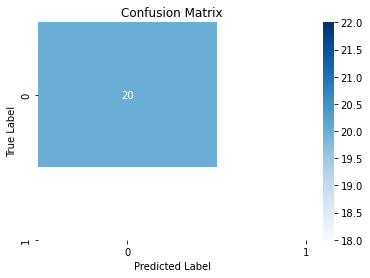

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [142]:
prediction_metrics(cnn, X_test, y_test, genders)

### Age

In [143]:
cnn = Sequential()

cnn.add(layers.Reshape((144, 144, 1), input_shape=(20736,)))
#cnn.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=X_train[1].shape))

cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))

cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))

cnn.add(layers.MaxPooling2D(2,2))

cnn.add(Flatten())

cnn.add(Dense(64, activation='relu'))

cnn.add(layers.Dropout(0.2))

#output layer with 2 filters for number of classes the model will choose to do predictions
#and since gender is just binary classification sigmoid is appropriate
#when doing classification for age (wont be binary classification) then softmax is good choice
cnn.add(Dense(6, activation='softmax'))

cnn.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_16 (Reshape)        (None, 144, 144, 1)       0         
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 72, 72, 1)        0         
 g2D)                                                            
                                                                 
 conv2d_92 (Conv2D)          (None, 72, 72, 32)        320       
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 36, 36, 64)        18496     
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 18, 18, 64)     

In [144]:
X_train, X_test, y_train, y_test = train_test_split(hog_features_norm, age_categories, test_size = 0.2,shuffle = True)

In [145]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [146]:
cnn.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

history_hog_age = cnn.fit(X_train, y_train,
        batch_size=32,
        epochs=25,
        validation_data=(X_test, y_test),)

Epoch 1/25
3/3 [==============================] - 2s 221ms/step - loss: 1.4796 - accuracy: 0.5375 - val_loss: 1.7843 - val_accuracy: 0.6500
Epoch 2/25
3/3 [==============================] - 0s 111ms/step - loss: 1.0493 - accuracy: 0.6500 - val_loss: 0.8270 - val_accuracy: 0.6500
Epoch 3/25
3/3 [==============================] - 0s 110ms/step - loss: 0.5238 - accuracy: 0.8250 - val_loss: 0.9314 - val_accuracy: 0.6500
Epoch 4/25
3/3 [==============================] - 0s 112ms/step - loss: 0.4773 - accuracy: 0.8500 - val_loss: 0.7901 - val_accuracy: 0.6500
Epoch 5/25
3/3 [==============================] - 0s 118ms/step - loss: 0.4213 - accuracy: 0.8500 - val_loss: 1.0467 - val_accuracy: 0.6500
Epoch 6/25
3/3 [==============================] - 0s 124ms/step - loss: 0.3562 - accuracy: 0.8625 - val_loss: 0.5572 - val_accuracy: 0.6500
Epoch 7/25
3/3 [==============================] - 0s 122ms/step - loss: 0.3000 - accuracy: 0.9000 - val_loss: 1.0969 - val_accuracy: 0.6500
Epoch 8/25
3/3 [====

1/1 [==============================] - 0s 123ms/step
MCC:  0.2788995520575487


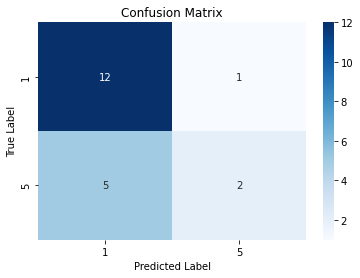

              precision    recall  f1-score   support

           1       0.71      0.92      0.80        13
           5       0.67      0.29      0.40         7

    accuracy                           0.70        20
   macro avg       0.69      0.60      0.60        20
weighted avg       0.69      0.70      0.66        20



In [147]:
prediction_metrics(cnn, X_test, y_test, age_classes)

## ORB

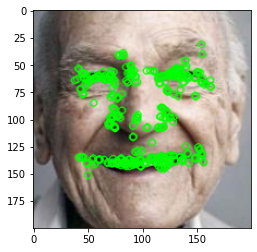

In [148]:
image_check = images[1]

orb = cv2.ORB_create()

kp = orb.detect(image_check, None)

kp, des = orb.compute(image_check, kp)

img2 = cv2.drawKeypoints(image_check, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2)
plt.show()

In [149]:
image_check = images[1]

orb = cv2.ORB_create()
# define minimum and maximum keypoints
MIN_KEYPOINTS = 100
orb_features = []
orb_genders = []
orb_ages = []

# loop over images and keypoints
for i, img in enumerate(images):
    keypoints, descriptors = orb.detectAndCompute(img, None)
    keypoints, descriptors = orb.compute(image_check, keypoints)
    keypoints = list(keypoints)    
    # check if number of keypoints is between min and max
    if len(keypoints) < MIN_KEYPOINTS:
        continue
        
    # remove extra keypoints randomly
    while len(keypoints) > MIN_KEYPOINTS:
        idx = random.randint(0, len(keypoints)-1)
        keypoints.pop(idx)
        descriptors = np.delete(descriptors, idx, axis=0)
        
    # add descriptors to feature list
    orb_features.append(np.ndarray.flatten(descriptors))
    orb_genders.append(genders[i])
    orb_ages.append(age_categories[i])

In [150]:
mean = np.mean(orb_features, axis=0)
std = np.std(orb_features, axis=0)
orb_features_norm = (orb_features - mean) / std

### Gender 

In [151]:
X_train, X_test, y_train, y_test = train_test_split(orb_features_norm, orb_genders, test_size=0.20, random_state=42)

In [152]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [153]:
cnn = Sequential()

# Input shape is (3200,)
cnn.add(layers.Reshape((50, 64, 1), input_shape=X_train[0].shape))

cnn.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(Flatten())
cnn.add(layers.Dense(64, activation='relu'))

cnn.add(layers.Dropout(0.5))

cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_17 (Reshape)        (None, 50, 64, 1)         0         
                                                                 
 conv2d_94 (Conv2D)          (None, 50, 64, 16)        160       
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 25, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_95 (Conv2D)          (None, 25, 32, 32)        4640      
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 12, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, 12, 16, 64)      

In [154]:
cnn.compile(optimizer="adam", loss="binary_crossentropy",
            metrics=['accuracy'])

history_orb_gender = cnn.fit(X_train, y_train,
                        epochs=2,
                        batch_size=32,
                        validation_data=(X_test, y_test))

Epoch 1/2
2/2 [==============================] - 2s 325ms/step - loss: 0.5409 - accuracy: 0.7188 - val_loss: 0.4245 - val_accuracy: 0.8750
Epoch 2/2
2/2 [==============================] - 0s 90ms/step - loss: 0.4146 - accuracy: 0.8750 - val_loss: 0.3989 - val_accuracy: 0.8750


1/1 [==============================] - 0s 122ms/step
MCC:  0.0


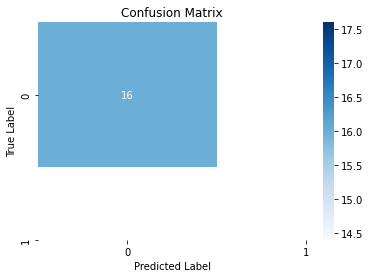

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [155]:
prediction_metrics(cnn, X_test, y_test, orb_genders)

### Age

In [156]:
X_train, X_test, y_train, y_test = train_test_split(orb_features_norm, orb_ages, test_size=0.20, random_state=42)

In [157]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [158]:
cnn = Sequential()

# Input shape is (3200,)
cnn.add(layers.Reshape((50, 64, 1), input_shape=X_train[0].shape))


cnn.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(Flatten())

cnn.add(layers.Dense(64, activation='relu'))

cnn.add(layers.Dropout(0.5))

cnn.add(layers.Dense(6, activation='softmax'))

#cnn.summary()

In [159]:
cnn.compile(optimizer="adam", loss="binary_crossentropy",
            metrics=['accuracy'])

history_orb_gender = cnn.fit(X_train, y_train,
                        epochs=2,
                        batch_size=32,
                        validation_data=(X_test, y_test))

Epoch 1/2
2/2 [==============================] - 2s 288ms/step - loss: 0.6186 - accuracy: 0.4844 - val_loss: 0.3959 - val_accuracy: 0.7500
Epoch 2/2
2/2 [==============================] - 0s 96ms/step - loss: 0.4211 - accuracy: 0.7656 - val_loss: 0.3062 - val_accuracy: 0.7500


1/1 [==============================] - 0s 110ms/step
MCC:  0.0


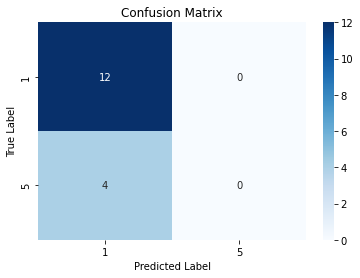

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        12
           5       0.00      0.00      0.00         4

    accuracy                           0.75        16
   macro avg       0.38      0.50      0.43        16
weighted avg       0.56      0.75      0.64        16



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [160]:
prediction_metrics(cnn, X_test, y_test, age_classes)

# DATA NORM

In [161]:
images = []
ages = []
genders = []
counter = 0

for file in files:
    if counter == 100:
        break
    
    image = cv2.imread(path+file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dsize=(200, 200))
    image = image.reshape((image.shape[0], image.shape[1], 3)) 
    #image = image.astype('float32') / 255.0 #normalizing values on each point 
    image = image / 255.0

    #verificar se imagens todas estao no range 0 a 255 (se sao rgb)

    images.append(image)
    delimit = file.split('_')
    ages.append(int(delimit[0]))
    # first number is age (0-116 possible values)
    genders.append(int(delimit[1]))
    # second number is gender (0 for male, 1 for female)


    counter += 1

## VGG 16

In [162]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

for layer in VGG_model.layers:
	layer.trainable = False
	
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [163]:
X = np.stack(images)
X = VGG_model.predict(X)

4/4 [==============================] - 13s 3s/step


### Gender

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, genders, test_size=0.2, random_state=42)

In [165]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [166]:
    model = tf.keras.Sequential()

    # Must define the input shape in the first layer of the neural network
    
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape = (6, 6, 512))) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    


    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    
    
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    
    model.add(tf.keras.layers.Dropout(0.5))
    
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, 6, 6, 16)          73744     
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 3, 3, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_101 (Conv2D)         (None, 3, 3, 32)          4640      
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 1, 1, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_102 (Conv2D)         (None, 1, 1, 64)          18496     
                                                                 
 flatten_28 (Flatten)        (None, 64)              

In [167]:
#for age use categorical_crossentropy instead
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

history_VGG16_gender = model.fit(X_train, y_train,
                    epochs=3,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/3
3/3 [==============================] - 2s 140ms/step - loss: 0.6140 - accuracy: 0.8625 - val_loss: 0.4932 - val_accuracy: 0.8000
Epoch 2/3
3/3 [==============================] - 0s 40ms/step - loss: 0.3651 - accuracy: 0.8625 - val_loss: 0.5902 - val_accuracy: 0.8000
Epoch 3/3
3/3 [==============================] - 0s 36ms/step - loss: 0.4620 - accuracy: 0.8750 - val_loss: 0.6698 - val_accuracy: 0.8000


1/1 [==============================] - 0s 110ms/step
MCC:  0.0


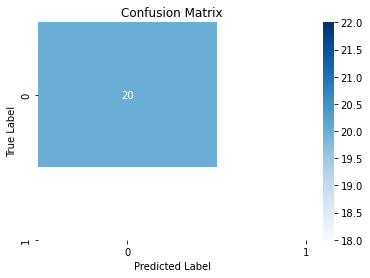

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [168]:
prediction_metrics(model, X_test, y_test, genders)

### Age

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, age_categories, test_size=0.2, random_state=42)

In [170]:
    model = tf.keras.Sequential()

    # Must define the input shape in the first layer of the neural network
    
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape = (6, 6, 512))) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    


    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    
    
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    
    model.add(tf.keras.layers.Dropout(0.5))
    
    model.add(tf.keras.layers.Dense(6, activation='softmax'))
    
    model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 6, 6, 16)          73744     
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 3, 3, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_104 (Conv2D)         (None, 3, 3, 32)          4640      
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 1, 1, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_105 (Conv2D)         (None, 1, 1, 64)          18496     
                                                                 
 flatten_29 (Flatten)        (None, 64)              

In [171]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

history_VGG16_age = model.fit(X_train, y_train,
        batch_size=32,
        epochs=2,
        validation_data=(X_test, y_test),)

Epoch 1/2
3/3 [==============================] - 2s 148ms/step - loss: 1.6392 - accuracy: 0.2875 - val_loss: 1.3510 - val_accuracy: 0.7500
Epoch 2/2
3/3 [==============================] - 0s 36ms/step - loss: 1.1952 - accuracy: 0.6250 - val_loss: 1.0857 - val_accuracy: 0.7500


1/1 [==============================] - 0s 106ms/step
MCC:  0.0


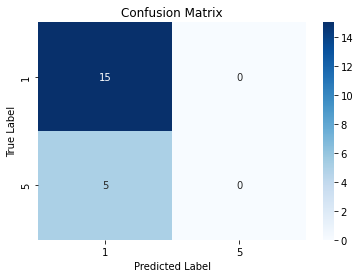

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        15
           5       0.00      0.00      0.00         5

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [172]:
prediction_metrics(model, X_test, y_train, age_classes)

## Autoencoder

### Gender

In [173]:
X_train, X_test, y_train, y_test = train_test_split(images, genders, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))

In [174]:
# binary cross entropy is good for imagprint("Autoencoder Started")
#### AUtoencoder
input = layers.Input(shape=(200, 200, 3))

#valor alto apanha artefactos, e valor baixo nao captura bem as features da imagem
latent_dim = 2000

## Classe 

# Encoder

#didnt increase filter count in encoder and decrease equally in decoder because
#it can lead to overfitting

x = layers.Conv2D(64, (3,3), activation='relu', padding='same', strides = 2)(input)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#dividir imagem por factor de 2
x = layers.Conv2D(32, (3,3), activation='relu', padding='same', strides = 2)(x)#reduziu se nr de filtros para 32 porque foi decidido factor de 32 filtros
#x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#25*25*16=10000
x = layers.Flatten()(x)
enc = layers.Dense(latent_dim, activation='relu')(x)

# Decoder

#having conv2D here helps to avoid checkerboard artifacts
#which are alternating points of colors (like checkerboard)
#that are consequence of deconvolutioning an image and cause 
#loss of quality in final reconstruction
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)

#equivalente a fazer dense layer no fim do encoder e no inicio do decoder
#fazer a layer dense fica um vector
#fazer reshape depois do 2 dense para voltar a ter imagem do vetor criado

x = layers.Dense(25*25*16, activation='relu')(enc)
x = layers.Reshape((25,25,16))(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation="relu", padding="same", strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
output = layers.Conv2DTranspose(3, (3,3), activation='sigmoid', padding='same', strides = 2)(x)

#maybe use strides in the layers too
#example:
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)

# Autoencoder
autoencoder = Model(input, output)

# binary cross entropy is good for image feature extraction especially when images are normalized
autoencoder.compile(optimizer="adam", loss="binary_crossentropy",
            metrics=['accuracy'])

autoencoder.summary()#e feature extraction especially when images are normalized


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_106 (Conv2D)         (None, 100, 100, 64)      1792      
                                                                 
 conv2d_107 (Conv2D)         (None, 50, 50, 32)        18464     
                                                                 
 conv2d_108 (Conv2D)         (None, 25, 25, 16)        4624      
                                                                 
 flatten_30 (Flatten)        (None, 10000)             0         
                                                                 
 dense_60 (Dense)            (None, 2000)              20002000  
                                                                 
 dense_61 (Dense)            (None, 10000)             2001

In [175]:
#using validation_data is good for detecting overfitting as 
#it does early stopping when the performance is no longer improving

autoencoder.fit(x = X_train, 
                y = X_train,
                epochs = 25,
                shuffle = True,
                batch_size = 32,
                validation_data = (X_test, X_test),)

Epoch 1/25
3/3 [==============================] - 6s 1s/step - loss: 0.6931 - accuracy: 0.5504 - val_loss: 0.6928 - val_accuracy: 0.7474
Epoch 2/25
3/3 [==============================] - 3s 1s/step - loss: 0.6927 - accuracy: 0.7486 - val_loss: 0.6924 - val_accuracy: 0.7759
Epoch 3/25
3/3 [==============================] - 3s 960ms/step - loss: 0.6922 - accuracy: 0.7758 - val_loss: 0.6919 - val_accuracy: 0.8073
Epoch 4/25
3/3 [==============================] - 3s 1s/step - loss: 0.6914 - accuracy: 0.8037 - val_loss: 0.6909 - val_accuracy: 0.8010
Epoch 5/25
3/3 [==============================] - 3s 1s/step - loss: 0.6893 - accuracy: 0.7468 - val_loss: 0.6854 - val_accuracy: 0.6965
Epoch 6/25
3/3 [==============================] - 3s 1s/step - loss: 0.6795 - accuracy: 0.6829 - val_loss: 0.6842 - val_accuracy: 0.7691
Epoch 7/25
3/3 [==============================] - 3s 1s/step - loss: 0.6717 - accuracy: 0.7920 - val_loss: 0.6775 - val_accuracy: 0.8673
Epoch 8/25
3/3 [======================

In [176]:
new_model = Model(input, enc)

encoded_train = new_model.predict(X_train)
encoded_test = new_model.predict(X_test)

encoded_train = np.asarray(encoded_train)
y_train = np.asarray(y_train)

encoded_test = np.asarray(encoded_test)
y_test = np.asarray(y_test)

1/1 [==============================] - 0s 71ms/step


In [177]:
cnn = Sequential()

# Input shape is (2000,)
cnn.add(layers.Reshape((40, 50, 1), input_shape=encoded_train[0].shape))

cnn.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(Flatten())

cnn.add(Dense(64, activation='relu'))

cnn.add(layers.Dropout(0.5))

#output layer with 2 filters for number of classes the model will choose to do predictions
#and since gender is just binary classification sigmoid is appropriate
#when doing classification for age (wont be binary classification) then softmax is good choice
cnn.add(Dense(1, activation='sigmoid'))

cnn.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_20 (Reshape)        (None, 40, 50, 1)         0         
                                                                 
 conv2d_109 (Conv2D)         (None, 40, 50, 16)        160       
                                                                 
 max_pooling2d_93 (MaxPoolin  (None, 20, 25, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_110 (Conv2D)         (None, 20, 25, 32)        4640      
                                                                 
 max_pooling2d_94 (MaxPoolin  (None, 10, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_111 (Conv2D)         (None, 10, 12, 64)      

In [178]:
#for age use categorical_crossentropy instead
cnn.compile(optimizer="adam", loss="binary_crossentropy",
            metrics=['accuracy'])

history_autoencoder_gender = cnn.fit(encoded_train, y_train,
                    epochs=25,
                    batch_size=32,
                    validation_data=(encoded_test, y_test))

Epoch 1/25
3/3 [==============================] - 2s 164ms/step - loss: 0.5067 - accuracy: 0.8250 - val_loss: 0.6119 - val_accuracy: 0.8000
Epoch 2/25
3/3 [==============================] - 0s 49ms/step - loss: 0.4494 - accuracy: 0.8750 - val_loss: 0.5405 - val_accuracy: 0.8000
Epoch 3/25
3/3 [==============================] - 0s 43ms/step - loss: 0.4425 - accuracy: 0.8750 - val_loss: 0.5156 - val_accuracy: 0.8000
Epoch 4/25
3/3 [==============================] - 0s 50ms/step - loss: 0.3994 - accuracy: 0.8750 - val_loss: 0.5132 - val_accuracy: 0.8000
Epoch 5/25
3/3 [==============================] - 0s 50ms/step - loss: 0.4191 - accuracy: 0.8750 - val_loss: 0.5241 - val_accuracy: 0.8000
Epoch 6/25
3/3 [==============================] - 0s 63ms/step - loss: 0.3714 - accuracy: 0.8750 - val_loss: 0.5272 - val_accuracy: 0.8000
Epoch 7/25
3/3 [==============================] - 0s 45ms/step - loss: 0.3724 - accuracy: 0.8750 - val_loss: 0.5189 - val_accuracy: 0.8000
Epoch 8/25
3/3 [==========

1/1 [==============================] - 0s 105ms/step
MCC:  0.0


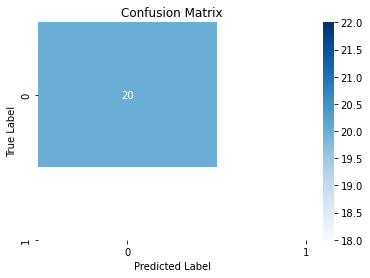

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [179]:
prediction_metrics(cnn, encoded_test, y_test, genders)

### Age

In [180]:
X_train, X_test, y_train, y_test = train_test_split(images, age_categories, test_size=0.2, random_state=42)

In [181]:
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))

In [182]:
print("Autoencoder Started")
#### AUtoencoder
input = layers.Input(shape=(200, 200, 3))

#valor alto apanha artefactos, e valor baixo nao captura bem as features da imagem
latent_dim = 2000

## Classe 

# Encoder

#didnt increase filter count in encoder and decrease equally in decoder because
#it can lead to overfitting

x = layers.Conv2D(64, (3,3), activation='relu', padding='same', strides = 2)(input)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#dividir imagem por factor de 2
x = layers.Conv2D(32, (3,3), activation='relu', padding='same', strides = 2)(x)#reduziu se nr de filtros para 32 porque foi decidido factor de 32 filtros
#x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#25*25*16=10000
x = layers.Flatten()(x)
enc = layers.Dense(latent_dim, activation='relu')(x)

# Decoder

#having conv2D here helps to avoid checkerboard artifacts
#which are alternating points of colors (like checkerboard)
#that are consequence of deconvolutioning an image and cause 
#loss of quality in final reconstruction
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)

#equivalente a fazer dense layer no fim do encoder e no inicio do decoder
#fazer a layer dense fica um vector
#fazer reshape depois do 2 dense para voltar a ter imagem do vetor criado

x = layers.Dense(25*25*16, activation='relu')(enc)
x = layers.Reshape((25,25,16))(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation="relu", padding="same", strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
output = layers.Conv2DTranspose(3, (3,3), activation='sigmoid', padding='same', strides = 2)(x)

#maybe use strides in the layers too
#example:
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)

# Autoencoder
autoencoder = Model(input, output)

# binary cross entropy is good for image feature extraction especially when images are normalized
autoencoder.compile(optimizer="adam", loss='categorical_crossentropy',
            metrics=['accuracy'])
autoencoder.summary()

Autoencoder Started
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_112 (Conv2D)         (None, 100, 100, 64)      1792      
                                                                 
 conv2d_113 (Conv2D)         (None, 50, 50, 32)        18464     
                                                                 
 conv2d_114 (Conv2D)         (None, 25, 25, 16)        4624      
                                                                 
 flatten_32 (Flatten)        (None, 10000)             0         
                                                                 
 dense_64 (Dense)            (None, 2000)              20002000  
                                                                 
 dense_65 (Dense)            (None, 100

In [183]:
autoencoder.fit(X_train, X_train,
                epochs = 25,
                shuffle = True,
                batch_size = 32,
                validation_data = (X_test, X_test),
)


Epoch 1/25
3/3 [==============================] - 5s 1s/step - loss: 1.8511 - accuracy: 0.4078 - val_loss: 1.6692 - val_accuracy: 0.5901
Epoch 2/25
3/3 [==============================] - 3s 1s/step - loss: 1.8510 - accuracy: 0.5772 - val_loss: 1.6691 - val_accuracy: 0.5499
Epoch 3/25
3/3 [==============================] - 3s 1s/step - loss: 1.8509 - accuracy: 0.4956 - val_loss: 1.6698 - val_accuracy: 0.3939
Epoch 4/25
3/3 [==============================] - 4s 1s/step - loss: 1.8568 - accuracy: 0.3850 - val_loss: 1.7449 - val_accuracy: 0.3889
Epoch 5/25
3/3 [==============================] - 4s 1s/step - loss: 2.2555 - accuracy: 0.3979 - val_loss: 3.7011 - val_accuracy: 0.4355
Epoch 6/25
3/3 [==============================] - 4s 1s/step - loss: 6.4988 - accuracy: 0.4580 - val_loss: 12.0197 - val_accuracy: 0.5177
Epoch 7/25
3/3 [==============================] - 3s 1s/step - loss: 21.3632 - accuracy: 0.5272 - val_loss: 37.7710 - val_accuracy: 0.5448
Epoch 8/25
3/3 [======================

In [184]:
new_model = Model(input, enc)
encoded_train = new_model.predict(X_train)
encoded_test = new_model.predict(X_test)

1/1 [==============================] - 0s 76ms/step


In [185]:
encoded_train = np.asarray(encoded_train)
y_train = np.asarray(y_train)

encoded_test = np.asarray(encoded_test)
y_test = np.asarray(y_test)

In [186]:
cnn = Sequential()

# Input shape is (2000,)
cnn.add(layers.Reshape((40, 50, 1), input_shape=encoded_train[0].shape))

cnn.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(Flatten())

cnn.add(Dense(64, activation='relu'))

cnn.add(layers.Dropout(0.5))

#output layer with 2 filters for number of classes the model will choose to do predictions
#and since gender is just binary classification sigmoid is appropriate
#when doing classification for age (wont be binary classification) then softmax is good choice
cnn.add(layers.Dense(6, activation='softmax'))

cnn.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_22 (Reshape)        (None, 40, 50, 1)         0         
                                                                 
 conv2d_115 (Conv2D)         (None, 40, 50, 16)        160       
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 20, 25, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_116 (Conv2D)         (None, 20, 25, 32)        4640      
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, 10, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_117 (Conv2D)         (None, 10, 12, 64)      

In [187]:
cnn.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

history_autoencoder_age = cnn.fit(encoded_train, y_train,
        batch_size=32,
        epochs=25,
        validation_data=(encoded_test, y_test),)

Epoch 1/25
3/3 [==============================] - 2s 174ms/step - loss: 66437.3359 - accuracy: 0.5125 - val_loss: 28724.1504 - val_accuracy: 0.7500
Epoch 2/25
3/3 [==============================] - 0s 54ms/step - loss: 27085.7695 - accuracy: 0.7375 - val_loss: 25373.4062 - val_accuracy: 0.7500
Epoch 3/25
3/3 [==============================] - 0s 53ms/step - loss: 36316.8828 - accuracy: 0.6750 - val_loss: 26312.3438 - val_accuracy: 0.7500
Epoch 4/25
3/3 [==============================] - 0s 49ms/step - loss: 14951.0781 - accuracy: 0.8000 - val_loss: 15510.9248 - val_accuracy: 0.7500
Epoch 5/25
3/3 [==============================] - 0s 51ms/step - loss: 16525.4277 - accuracy: 0.7125 - val_loss: 8628.0645 - val_accuracy: 0.7500
Epoch 6/25
3/3 [==============================] - 0s 51ms/step - loss: 4868.9678 - accuracy: 0.7250 - val_loss: 4995.4282 - val_accuracy: 0.7500
Epoch 7/25
3/3 [==============================] - 0s 63ms/step - loss: 6142.8281 - accuracy: 0.6875 - val_loss: 2344.437

1/1 [==============================] - 0s 109ms/step
MCC:  0.0


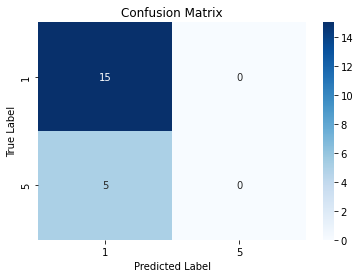

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        15
           5       0.00      0.00      0.00         5

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [188]:
prediction_metrics(cnn, encoded_test, y_test, age_classes)